# VaR Analysis Historical Method

This is a Value at Risk analysis Historical Data Method to determine the possible amount of money you could lose if you invest in the companies below

In [31]:
# importing necessary libraries

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm

## We will be using GSMI, EMI, and FB as example

In [33]:
# Importing excel file
df = pd.read_excel("PH stocks.xlsx", index_col=False)
df = df.set_index("Date")
df = df.dropna()
df.head()

,GSMI,EMI,FB
Date,,,
2019-10-04,47.95,7.04,90.00
2019-10-07,47.00,7.00,90.70
2019-10-08,46.80,7.00,89.25
2019-10-09,46.05,7.00,90.00
2019-10-10,46.50,7.00,90.00


In [34]:
# Calculating log returns

log_returns = np.log(df/df.shift(1))
log_returns = log_returns.dropna()
log_returns

,GSMI,EMI,FB
Date,,,
2019-10-07,-0.020011,-0.005698,0.007748
2019-10-08,-0.004264,0.000000,-0.016116
2019-10-09,-0.016155,0.000000,0.008368
2019-10-10,0.009725,0.000000,0.000000
2019-10-11,0.010695,0.000000,-0.000556
...,...,...,...
2024-09-27,0.011429,0.003193,-0.026567
2024-09-30,0.003026,-0.003193,0.036814
2024-10-01,0.002263,0.000000,0.005545


In [35]:
# Creating an equally weighted portfolio

stocks = df.columns
stocks = list(stocks)

portfolio_value = 1000000
weights = np.array([1/len(stocks)]*len(stocks))
weights

array([0.33333333, 0.33333333, 0.33333333])

In [36]:
# Calculating the historical portfolio returns

hreturns = (log_returns * weights).sum(axis = 1)
hreturns

Date
2019-10-07   -0.005987
2019-10-08   -0.006793
2019-10-09   -0.002596
2019-10-10    0.003242
2019-10-11    0.003380
                ...   
2024-09-27   -0.003982
2024-09-30    0.012216
2024-10-01    0.002603
2024-10-02   -0.006118
2024-10-03   -0.003715
Length: 1216, dtype: float64

In [49]:
# X days historical portfolio returns

days = 5
xdays = hreturns.rolling(window=days).sum()
xdays = xdays.dropna()

xdays.tail()

Date
2024-09-27    0.000842
2024-09-30    0.018693
2024-10-01    0.006604
2024-10-02   -0.000443
2024-10-03    0.001004
dtype: float64

In [38]:
# Calculating VAR

confidence_interval = 0.95

VaR = -np.percentile(xdays, 100 - (confidence_interval * 100)) * portfolio_value

VaR

35323.46121092132

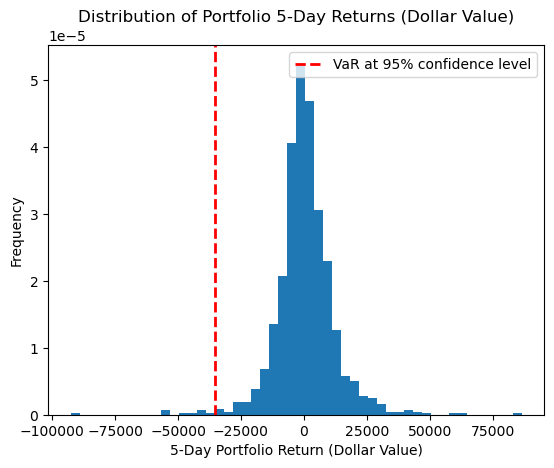

In [39]:
# Plotting 

hreturns_dollar = hreturns * portfolio_value

plt.hist(hreturns_dollar, bins=50, density= True)
plt.xlabel(f'{days}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f"Distribution of Portfolio {days}-Day Returns (Dollar Value)")
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth = 2, label= f'VaR at {confidence_interval:.0%} confidence level') 
plt.legend()
plt.show()